In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cab_data = pd.read_csv("true_cab.csv")
city = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")
customer_id = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")
transaction_id = pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")

In [2]:
cab_data = cab_data.drop(columns = ['Unnamed: 0', 'Unnamed: 8', 'Unnamed: 9'])

Time to clean the data...

In [3]:
cab_data = cab_data.dropna()

In [4]:
first = transaction_id.merge(customer_id, on = 'Customer ID', how = 'left')
second = first.merge(cab_data, on = 'Transaction ID', how = 'right')
final_data = second.merge(city, on = 'City', how = 'left')

In [5]:
final_data['profit'] = final_data['Price Charged'] - final_data['Cost of Trip']

In [6]:
final_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,profit
0,10000011,29290,Card,Male,28,10813,1/8/16,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",57.3150
1,10000012,27703,Card,Male,27,9237,1/6/16,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",23.6660
2,10000013,28712,Cash,Male,53,11242,1/2/16,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",27.5680
3,10000014,28020,Cash,Male,23,23327,1/7/16,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",25.7980
4,10000015,27182,Card,Male,33,8536,1/3/16,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,1/8/18,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",5.8800
359388,10440104,53286,Cash,Male,32,6528,1/4/18,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",6.9020
359389,10440105,52265,Cash,Male,56,7966,1/5/18,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",87.4200
359390,10440106,52175,Card,Male,32,6423,1/5/18,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",32.1420


Hypothesis 1: Which company makes more in profit? How about per ride?

In [6]:
grouped = final_data.groupby('Company').sum()

In [7]:
profit_table = pd.DataFrame(index = ["Pink Cab", "Yellow Cab"])
profit_table['profit'] = [grouped['profit'][0], grouped['profit'][1]]

In [8]:
grouped_count = final_data.groupby('Company').mean()

In [9]:
profit_table['profit per ride'] = grouped_count['profit']

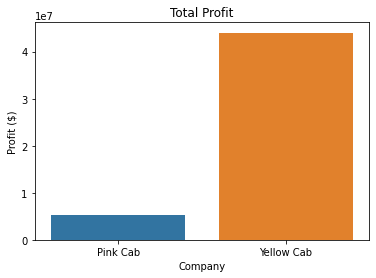

In [38]:
sns.barplot(data = profit_table, x = profit_table.index, y = 'profit');

plt.title("Total Profit");
plt.xlabel('Company');
plt.ylabel("Profit ($)");


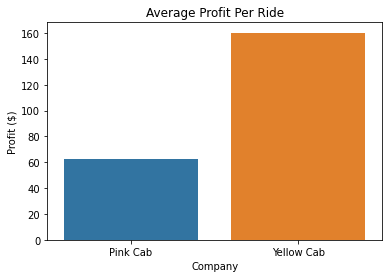

In [61]:
sns.barplot(data = profit_table, x = profit_table.index, y = 'profit per ride');

plt.title("Average Profit Per Ride");
plt.xlabel('Company');
plt.ylabel("Profit ($)");


Hypothesis 2: Are there certain cities where a company is more profitable?

In [46]:
grouped_city = final_data.groupby(['City', 'Company']).sum()
grouped_city['per ride'] = final_data.groupby(['City', 'Company']).mean()['profit']
profit_table_city = grouped_city[['profit', 'per ride']]

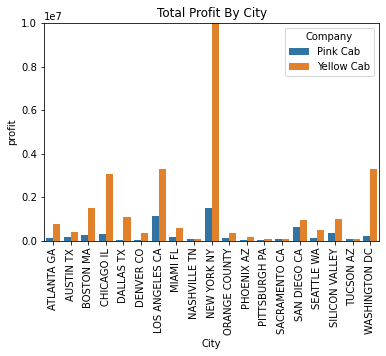

In [59]:
sns.barplot(data = profit_table_city.reset_index(), x = 'City', y = 'profit', hue = 'Company');

plt.xticks(rotation = 90);
plt.ylim(0, 10000000);
plt.title("Total Profit By City");

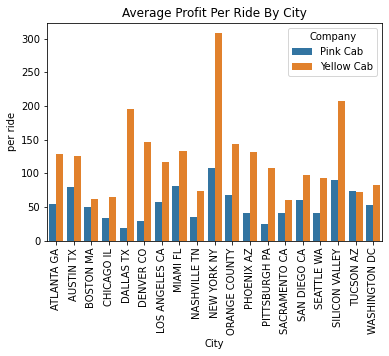

In [60]:
sns.barplot(data = profit_table_city.reset_index(), x = 'City', y = 'per ride', hue = 'Company');

plt.xticks(rotation = 90);
plt.title("Average Profit Per Ride By City");

Hypothesis 3: Which company retains more users (defined as 3 or more rides)?

In [62]:
grouped_user = final_data.groupby('Customer ID').count()
grouped_user_final = grouped_user[grouped_user['profit'] >= 3]
the_index = grouped_user_final.index

In [63]:
retained = final_data[final_data['Customer ID'].isin(the_index)]

In [64]:
grouped_ret = retained.groupby(['City', 'Company']).count()

In [65]:
hyp3_table = grouped_ret[['profit']].rename({'profit':'retained users'})


(0.0, 55000.0)

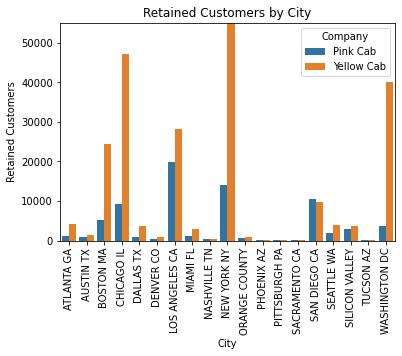

In [69]:
sns.barplot(data = hyp3_table.reset_index(), x = 'City', y = 'profit', hue = 'Company');

plt.xticks(rotation = 90);
plt.title("Retained Customers by City");
plt.xlabel("City");
plt.ylabel("Retained Customers");
plt.ylim(0, 55000);

But what if we define "retained" as 15 or more rides?

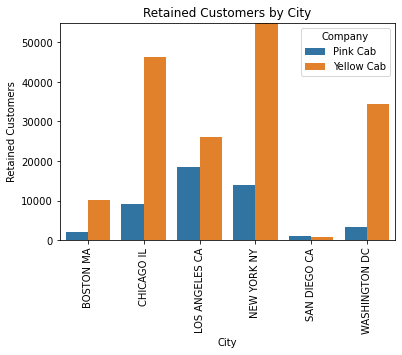

In [75]:
grouped_use1r = final_data.groupby('Customer ID').count()
grouped_user_final1 = grouped_user[grouped_user['profit'] >= 12]
the_index1 = grouped_user_final1.index
retained1 = final_data[final_data['Customer ID'].isin(the_index1)]
grouped_ret1 = retained1.groupby(['City', 'Company']).count()
hyp3_table1 = grouped_ret1[['profit']].rename({'profit':'retained users'})
sns.barplot(data = hyp3_table1.reset_index(), x = 'City', y = 'profit', hue = 'Company');

plt.xticks(rotation = 90);
plt.title("Retained Customers by City");
plt.xlabel("City");
plt.ylabel("Retained Customers");
plt.ylim(0, 55000);

Hypothesis 4: Does user income have an impact?

In [15]:
pink = final_data[final_data['Company'] == 'Pink Cab']
yellow = final_data[final_data['Company'] == 'Yellow Cab']

In [16]:
poor = 32048 /12
lower_middle = 53413 / 12
middle = 106827 / 12
upper_middle = 373894 / 12

In [17]:
def classifier(df):
    to_return = []
    for x in df['Income (USD/Month)']:
        if x <= poor:
            to_return.append("Lower")
        elif x >= poor and x <= lower_middle:
            to_return.append("Lower-Middle")
        elif x >= lower_middle and x <= middle:
            to_return.append("Middle")
        elif x >= middle and x <= upper_middle:
            to_return.append("Middle-Upper")
        else:
            to_return.append("Upper")
    return to_return

final_data['Class'] = classifier(final_data)

In [18]:
grouped_class = final_data.groupby(['Class', 'Company']).count()
grouped_class

Transaction ID  Customer ID  Payment_Mode  Gender  \
Class        Company                                                         
Lower        Pink Cab              2309         2309          2309    2309   
             Yellow Cab            7258         7258          7258    7258   
Lower-Middle Pink Cab              5971         5971          5971    5971   
             Yellow Cab           19545        19545         19545   19545   
Middle       Pink Cab             14743        14743         14743   14743   
             Yellow Cab           47278        47278         47278   47278   
Middle-Upper Pink Cab             58670        58670         58670   58670   
             Yellow Cab          190898       190898        190898  190898   
Upper        Pink Cab              3018         3018          3018    3018   
             Yellow Cab            9702         9702          9702    9702   

                            Age  Income (USD/Month)  Date of Travel    City  \
Class        Company                                                          
Lower        Pink Cab      2309                2309            2309    2309   
             Yellow Cab    7258                7258            7258    7258   
Lower-Middle Pink Cab      5971                5971            5971    5971   
             Yellow Cab   19545               19545           19545   19545   
Middle       Pink Cab     14743               14743           14743   14743   
             Yellow Cab   47278               47278           47278   47278   
Middle-Upper Pink Cab     58670               58670           58670   58670   
             Yellow Cab  190898              190898          190898  190898   
Upper        Pink Cab      3018                3018            3018    3018   
             Yellow Cab    9702                9702            9702    9702   

                         KM Travelled  Price Charged  Cost of Trip  \
Class        Company                                                 
Lower        Pink Cab            2309           2309          2309   
             Yellow Cab          7258           7258          7258   
Lower-Middle Pink Cab            5971           5971          5971   
             Yellow Cab         19545          19545         19545   
Middle       Pink Cab           14743          14743         14743   
             Yellow Cab         47278          47278         47278   
Middle-Upper Pink Cab           58670          58670         58670   
             Yellow Cab        190898         190898        190898   
Upper        Pink Cab            3018           3018          3018   
             Yellow Cab          9702           9702          9702   

                         Population   Users  profit  
Class        Company                                 
Lower        Pink Cab          2309    2309    2309  
             Yellow Cab        7258    7258    7258  
Lower-Middle Pink Cab          5971    5971    5971  
             Yellow Cab       19545   19545   19545  
Middle       Pink Cab         14743   14743   14743  
             Yellow Cab       47278   47278   47278  
Middle-Upper Pink Cab         58670   58670   58670  
             Yellow Cab      190898  190898  190898  
Upper        Pink Cab          3018    3018    3018  
             Yellow Cab        9702    9702    9702

In [19]:
hyp4_table = grouped_class[['profit']]


In [20]:
def percentager(df):
    to_return = []
    x = 0
    y = 1
    counter = 0
    yellow_p = len(yellow['City'])
    pink_p = len(pink['City'])
    while counter < len(df) / 2:
        pinker = df['profit'][x] / pink_p
        yellower = df['profit'][y] / yellow_p
        to_return.append(pinker)
        to_return.append(yellower)
        x += 2
        y += 2
        counter += 1
    return to_return

In [21]:
hyp4_table['percentage'] = percentager(hyp4_table)

/tmp/ipykernel_44/1965032456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyp4_table['percentage'] = percentager(hyp4_table)


In [22]:
hyp4_table

profit  percentage
Class        Company                       
Lower        Pink Cab      2309    0.027257
             Yellow Cab    7258    0.026423
Lower-Middle Pink Cab      5971    0.070487
             Yellow Cab   19545    0.071155
Middle       Pink Cab     14743    0.174039
             Yellow Cab   47278    0.172120
Middle-Upper Pink Cab     58670    0.692590
             Yellow Cab  190898    0.694981
Upper        Pink Cab      3018    0.035627
             Yellow Cab    9702    0.035321

In [111]:
pink4 = hyp4_table.reset_index().loc[np.arange(0, 10, 2), :]
yellow4 = hyp4_table.reset_index().loc[np.arange(1, 11, 2), :]

pink4

,Class,Company,profit,percentage
1,Lower,Yellow Cab,7258,0.026423
3,Lower-Middle,Yellow Cab,19545,0.071155
5,Middle,Yellow Cab,47278,0.172120
7,Middle-Upper,Yellow Cab,190898,0.694981
9,Upper,Yellow Cab,9702,0.035321


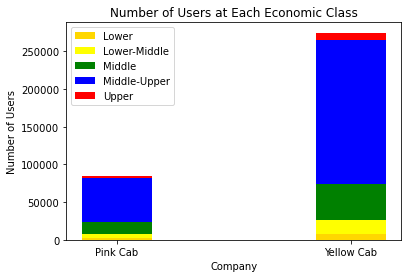

In [151]:
labels = ['Pink Cab', 'Yellow Cab']
colors = ['red', 'blue', 'green', 'yellow', 'gold']

yo = colors.pop()
x1 = hyp4_table.reset_index()['profit'][0:2].values
plt.bar(labels, x1, width = .3, color = yo)

for x in np.arange(2, 9, 2):
    y1 = hyp4_table.reset_index()['profit'][x:x+2].values
    string = colors.pop()
    plt.bar(labels, y1, bottom = x1, width = .3, color = string)
    x1 += y1
    
plt.legend(pink4['Class']);
plt.title("Number of Users at Each Economic Class");
plt.ylabel("Number of Users");
plt.xlabel("Company");

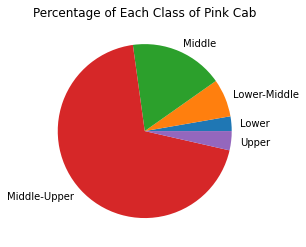

In [147]:
plt.pie(pink4['percentage'], labels = pink4['Class']);

plt.title("Percentage of Each Class of Pink Cab");

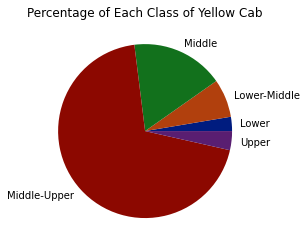

In [148]:
pallette = sns.color_palette('dark');
plt.pie(yellow4['percentage'], labels = yellow4['Class'], colors = pallette);

plt.title("Percentage of Each Class of Yellow Cab");

Hypothesis 5: What about age? *pie chart*

In [23]:
unique_cust = final_data.groupby('Customer ID', as_index = False).first()

In [24]:
def age_classifier(df):
    to_return = []
    for x in df['Age']:
        if x < 35:
            to_return.append("Young")
        elif x >= 35 and x < 55:
            to_return.append("Middle-Age")
        else:
            to_return.append("Old")
    return to_return

In [25]:
unique_cust['Age Range'] = age_classifier(unique_cust)

In [26]:
grouped_age = unique_cust.groupby(["Age Range", "Company"]).count()

In [160]:
pink5 = grouped_age.reset_index().loc[np.arange(0, 6, 2), :]
yellow5 = grouped_age.reset_index().loc[np.arange(1, 7, 2), :]
yellow5

,Age Range,Company,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,profit,Class
1,Middle-Age,Yellow Cab,10646,10646,10646,10646,10646,10646,10646,10646,10646,10646,10646,10646,10646,10646,10646
3,Old,Yellow Cab,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633,3633
5,Young,Yellow Cab,17040,17040,17040,17040,17040,17040,17040,17040,17040,17040,17040,17040,17040,17040,17040


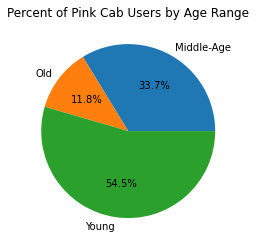

In [164]:
plt.pie(pink5['Customer ID'], labels = pink5['Age Range'], autopct='%1.1f%%');

plt.title("Percent of Pink Cab Users by Age Range");

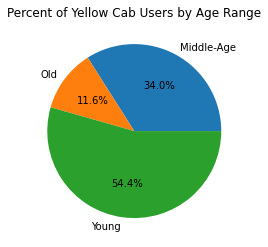

In [166]:
plt.pie(yellow5['Customer ID'], labels = yellow5['Age Range'], autopct='%1.1f%%');

plt.title("Percent of Yellow Cab Users by Age Range");